# Program to Predict A Doctor's Consultation Fee 

# Problem Definition

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.

# Problem Description

Size of training set: 5961 records

Size of test set: 1987 records

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading training data
df=pd.read_excel(r"C:\Users\arunp\Desktop\Final Participant Data Folder\final_train.xlsx")
df.head()


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
#loading test data
df_test=pd.read_excel(r"C:\Users\arunp\Desktop\Final Participant Data Folder\final_test.xlsx")
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


###### Attributes Description

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

# Basic Statistics of Our DataSet

In [4]:
#Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
#datatypes of the Attributes
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [6]:
#no.of.rows and columns
df.shape

(5961, 7)

In [7]:
#column names
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

# Finding Missing Values

In [8]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

###### Observation:
    
    we find missing values in column
    
    1)Rating
    
    2)Place
    
    3)Miscellaneous_info
    
    now we will fill the Nan with appropriate values

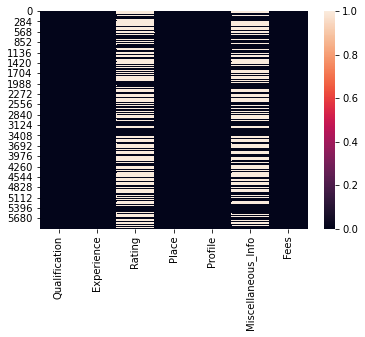

In [9]:
#Graphical Visuvalization of Missing values
sns.heatmap(df.isnull())

# Filling NAN values

## Column Rating

In [10]:

df["Rating"].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
84%      13
79%      13
81%      12
67%      12
76%       9
71%       9
73%       8
75%       8
74%       7
60%       7
78%       6
56%       5
68%       5
70%       4
69%       4
72%       3
57%       3
33%       2
55%       2
62%       2
63%       2
64%       2
65%       1
45%       1
40%       1
53%       1
36%       1
48%       1
7%        1
47%       1
58%       1
Name: Rating, dtype: int64

In [11]:
df["Rating"].isnull().sum()

3302

In [12]:
df["Rating"].shape

(5961,)

###### Observation:
    
    Nearly 50% Datas are missing in column "Rating"
    
    The Datatype of Column Rating is of Object Type
    
    Dropping of Missing Column will result in huge loss of Data
    
    so we fill the missing value of column Rating with mean value
    
steps:

    1)At fisrt we need to strip of "%"
    
    2)converting Rating column to datatype Float
    
    3)filling NaN values with mode value

In [13]:
df["Rating"]

0       100%
1        98%
2        NaN
3        NaN
4       100%
        ... 
5956     98%
5957     NaN
5958     97%
5959     90%
5960    100%
Name: Rating, Length: 5961, dtype: object

In [14]:
#At fisrt we need to strip of "%"
df["Rating"]=df["Rating"].str.strip("%")

In [15]:
#converting Rating column to datatype Float
df["Rating"]=df["Rating"].astype(float)

In [16]:
df["Rating"].mean()

94.64347499059797

In [17]:
#filling NaN values with mode value
df["Rating"].fillna(df["Rating"].mean(),inplace=True)

In [18]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

## column Miscellaneous_info

In [19]:

df["Miscellaneous_Info"].value_counts().head()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      40
Tooth Extraction Dental Fillings Scaling / Polishing                                    12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                   12
Skin Allergy Treatment Skin Allergies Dermabrasion                                       9
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment     9
Name: Miscellaneous_Info, dtype: int64

In [20]:
df["Miscellaneous_Info"].isnull().sum()

2620

In [21]:
df["Miscellaneous_Info"].shape

(5961,)

###### Observation:
    
    Nearly 50% Datas are missing in column "Miscellaneous_Info"
    
    The Datatype of Column "Miscellaneous_Info" is of Object Type
    
    Dropping of Missing Column will result in huge loss of Data
    
    so we fill the missing value of column Rating with "missing"

In [22]:
#Filling Nan values with "missing" in column Miscellaneous_Info
df["Miscellaneous_Info"].fillna("missing",inplace=True)

In [23]:
#Rechecking null values in column Miscellaneous_Info
df["Miscellaneous_Info"].isnull().sum()

0

## Column Place

In [24]:
df["Place"].value_counts()

HSR Layout, Bangalore            75
Andheri West, Mumbai             70
Dwarka, Delhi                    67
Banjara Hills, Hyderabad         64
Mulund West, Mumbai              54
                                 ..
Vellakinar, Coimbatore            1
TV Chalai, Thiruvananthapuram     1
GTB Nagar, Delhi                  1
Vasant Enclave, Delhi             1
Rajendra Nagar, Hyderabad         1
Name: Place, Length: 877, dtype: int64

In [25]:
df["Place"].isnull().sum()

25

In [26]:
df["Place"].shape

(5961,)

###### Observation:
    
    very low amount of Datas are missing in column "Place"
    
    The Datatype of Column Place is of Object Type
    
    Dropping of Missing Column will not result in huge loss of Data
    
    so we drop the missing value 

In [27]:
#Dropping missing values in column Place
df.dropna(inplace=True)

In [28]:
#Rechecking missing values
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

###### Observation:
    
    we cleared all NaN values

# Data Pre-Processing

## Exlporing columns of Data type Object

In [29]:
df.dtypes

Qualification          object
Experience             object
Rating                float64
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                    int64
dtype: object

###### observation:
    
    column with datatype object
    
    1)Qualification          object
    
    2)Experience             object
    
    3)Place                  object
    
    4)Profile                object
    
    5)Miscellaneous_Info     object

### column Experience

In [30]:
df["Experience"].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years experience',
       '17 y

###### Observation:
    
    we see that Experience column is filled with both integer and string values
    
    All we need is the Integer value .
    
    so At fisrt we need to strip of "years experience"
    
    Then We can convert experience column to datatype int

In [31]:
#strip of " years experience"
df["Experience"]=df["Experience"].str.strip(" years experience")

In [32]:
#converting experience column to datatype int
df["Experience"]=df["Experience"].astype(int)

### column Profile

In [33]:
df["Profile"].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [34]:
df["Profile"].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1009
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

###### Obesrvation:
    
    The column profile is of type object. 
    
    so we first replace the string value to numeric
    
    then convert the type object to type integer

In [35]:
#converting object type to integer
df["Profile"]=df["Profile"].map({'Homeopath':0,"Ayurveda":1,"ENT Specialist":2,"Dentist":3,"General Medicine":4,"Dermatologists":5})

### column Miscellaneous_Info

In [36]:
df["Miscellaneous_Info"].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', 'missing', ...,
       '98% 45 Feedback Basavanagudi, Bangalore',
       '97% 11 Feedback Greater Kailash Part 2, Delhi',
       'General Medical Consultation Viral Fever Treatment Infectious Disease Treatment'],
      dtype=object)

In [37]:
df["Miscellaneous_Info"].value_counts()

missing                                                                  2595
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth         40
Dental Fillings Zirconia Crowns Dental Implant Fixing                      12
Tooth Extraction Dental Fillings Scaling / Polishing                       12
Skin Allergy Treatment Skin Allergies Dermabrasion                          9
                                                                         ... 
98% 444 Feedback Tambaram, Chennai                                          1
100% 10 Feedback Malleswaram, Bangalore                                     1
97% 103 Feedback Munirka, Delhi                                             1
100% 2 Feedback Ramamurthy Nagar, Bangalore                                 1
Cosmetic/ Aesthetic Dentistry Dental Fillings Acrylic Partial Denture       1
Name: Miscellaneous_Info, Length: 2999, dtype: int64

###### Observation:

Missing data is high in column Miscellaneous_Info

we can clearly see the Miscellaneous_Info is not gonna help much in predicting the doctors fee.

so dropping column Miscellaneous_Info is recommended

In [38]:
#Dropping column Miscellaneous_Info
df.drop("Miscellaneous_Info",axis=1,inplace=True)

### column place

In [39]:
df["Place"].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [40]:
df["Place"].value_counts()

HSR Layout, Bangalore            75
Andheri West, Mumbai             70
Dwarka, Delhi                    67
Banjara Hills, Hyderabad         64
Mulund West, Mumbai              54
                                 ..
Vellakinar, Coimbatore            1
TV Chalai, Thiruvananthapuram     1
GTB Nagar, Delhi                  1
Vasant Enclave, Delhi             1
Rajendra Nagar, Hyderabad         1
Name: Place, Length: 877, dtype: int64

###### Observation

we can say that column Place may be correlated to the doctors fees in some ways.

All the values are of type Object.

we observe that the place value is filled with locality and city.

so we split the place with locality and area as saperate columns

In [41]:
#Seperating place into "locality" and "city"
df['locality'] = df['Place'].str.split(",").str[0]
df['city'] = df['Place'].str.split(",").str[1]


In [42]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100.000000,"Kakkanad, Ernakulam",0,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.000000,"Whitefield, Bangalore",1,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,94.643475,"Mathikere - BEL, Bangalore",2,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,94.643475,"Bannerghatta Road, Bangalore",1,250,Bannerghatta Road,Bangalore
4,BAMS,20,100.000000,"Keelkattalai, Chennai",1,250,Keelkattalai,Chennai


In [43]:
#Exploring column Locality and city
print(df["locality"].value_counts())
print(df["city"].value_counts())

HSR Layout       75
Andheri West     70
Dwarka           68
Banjara Hills    64
Mulund West      54
                 ..
Nanjundapuram     1
RMV 2nd Stage     1
Pondy Bazaar      1
Chaitanyapuri     1
Domalguda         1
Name: locality, Length: 866, dtype: int64
 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: city, dtype: int64


###### Observation:
    
    we seperated column "Place" into "locality" and "city".
    
    now Column Place is no more needed. so droping of column "place" to be done
     
    By observing column Locality and city,we conclude that 
    
    1)column city and locality represent same. so
    
    2)Column locality doesnt help much in predicting our target.
    
    so dropping of column "locality" is to be done

In [44]:
#Dropping column "Place" 
df.drop("Place",axis=1,inplace=True)

In [45]:
#Dropping column "locality"
df.drop("locality",axis=1,inplace=True)

### exploring column city

In [46]:
df["city"].value_counts()


 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: city, dtype: int64

In [47]:
#Datatype of column city
df["city"].dtypes

dtype('O')

In [48]:
#finding Null value
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
city             1
dtype: int64

###### Observation:
    
    1)The city is of datatype object
    
     So converting it into numeric have to be done
    
    2)we find missing value in column city
    
     so dropping of missing column have to be done

In [49]:
#droping Nan values in column city
df.dropna(inplace=True)

In [50]:
#Rechecking missing value
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
city             0
dtype: int64

In [51]:
df["city"].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', ' Sector 5'],
      dtype=object)

In [52]:
#converting Dtype of column city from object to integer
#using Label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["city"]=le.fit_transform(df["city"])
df

,Qualification,Experience,Rating,Profile,Fees,city
0,"BHMS, MD - Homeopathy",24,100.000000,0,100,4
1,"BAMS, MD - Ayurveda Medicine",12,98.000000,1,350,0
2,"MBBS, MS - Otorhinolaryngology",9,94.643475,2,300,0
3,"BSc - Zoology, BAMS",12,94.643475,1,250,0
4,BAMS,20,100.000000,1,250,1
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98.000000,2,300,0
5957,MBBS,33,94.643475,4,100,1
5958,MBBS,41,97.000000,4,600,3
5959,"MBBS, MD - General Medicine",15,90.000000,4,100,6


###### Observation:

    "0" represents "Banglore"
    
    "1" represents "chennai"
    
    "2" represents "coimbatore"
    
    "3" represents "Delhi"
    
    "4" represents "Ernakulam"
    
    "5" represents "Hydrabad"
    
    "6" represents "Mumbai"
    
    "7" represents "sector 5"
    
    "8" represents "Thiruvananthapuram"

### column Qualification

In [53]:
df["Qualification"].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [54]:
df["Qualification"].nunique()

1419

In [55]:
df["Qualification"].value_counts()

BDS                                                                                                          487
BHMS                                                                                                         477
BAMS                                                                                                         471
MBBS                                                                                                         334
MBBS, MS - ENT                                                                                               220
                                                                                                            ... 
BDS, MDS - Orthodontics and Orofacial Orthopaedics                                                             1
MD - Dermatology, Diploma in Dermatology, MBBS                                                                 1
MBBS, DNB - Pulmonary Medicine, DIPLOMA IN TB AND CHEST DISEASES, Advanced Certificate Course In

In [56]:
df["Qualification"].value_counts().sum()

5935

In [57]:
Qualification = list(df['Qualification'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in Qualification :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Qualification in a Cell : ", maxim)    



Maximum Qualification in a Cell :  10


###### Observation:
    
    Maximum number of Qualification mentioned in a single cell is 10
    
    And the data is to much messy like, 'MBA -Healthcare' and ‘MBA’ which referred to same category .
    
    so we go with major Degree in qualification column
    
    most of the major degree are in 1st two of each cell

In [58]:
df['Qualification1'] = df['Qualification'].str.split(",").str[0]
df['Qualification2'] = df['Qualification'].str.split(",").str[1]



In [59]:
df

,Qualification,Experience,Rating,Profile,Fees,city,Qualification1,Qualification2
0,"BHMS, MD - Homeopathy",24,100.000000,0,100,4,BHMS,MD - Homeopathy
1,"BAMS, MD - Ayurveda Medicine",12,98.000000,1,350,0,BAMS,MD - Ayurveda Medicine
2,"MBBS, MS - Otorhinolaryngology",9,94.643475,2,300,0,MBBS,MS - Otorhinolaryngology
3,"BSc - Zoology, BAMS",12,94.643475,1,250,0,BSc - Zoology,BAMS
4,BAMS,20,100.000000,1,250,1,BAMS,NaN
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98.000000,2,300,0,MBBS,MS - ENT
5957,MBBS,33,94.643475,4,100,1,MBBS,NaN
5958,MBBS,41,97.000000,4,600,3,MBBS,NaN
5959,"MBBS, MD - General Medicine",15,90.000000,4,100,6,MBBS,MD - General Medicine


In [60]:
df["Qualification1"].nunique(),df["Qualification2"].nunique()

(150, 426)

###### Observation:

    we seperated the major degree from Qualification into Qualification1 and Qualification2
    
    now we no need of column Qualification so dropping it

In [61]:
#Dropping column Qualification
df.drop("Qualification",axis=1,inplace=True)

### column Qualification1 and Qualification 2

###### Observation:

    from column Qualification1 and Qualification1 we see Missing values
    
    filling NaN values with word Missing

In [62]:
#finding nan values
df.isnull().sum()

Experience           0
Rating               0
Profile              0
Fees                 0
city                 0
Qualification1       0
Qualification2    1937
dtype: int64

###### Processing column Qualification1 and Qualification2:

     1)filling NaN values in column Qualification2 with word "missing"
     
     2)since the data type of column Qualification1 and Qualification2 is object we convert both into numeric using label encoding
     
     

In [63]:
#Filling column Qualification with "missing"
df["Qualification2"].fillna("missing",inplace=True)

In [64]:
#rechecking missing value
df.isnull().sum()

Experience        0
Rating            0
Profile           0
Fees              0
city              0
Qualification1    0
Qualification2    0
dtype: int64

# EDA

## Unilateral Analysis

### CountPlot for Rating

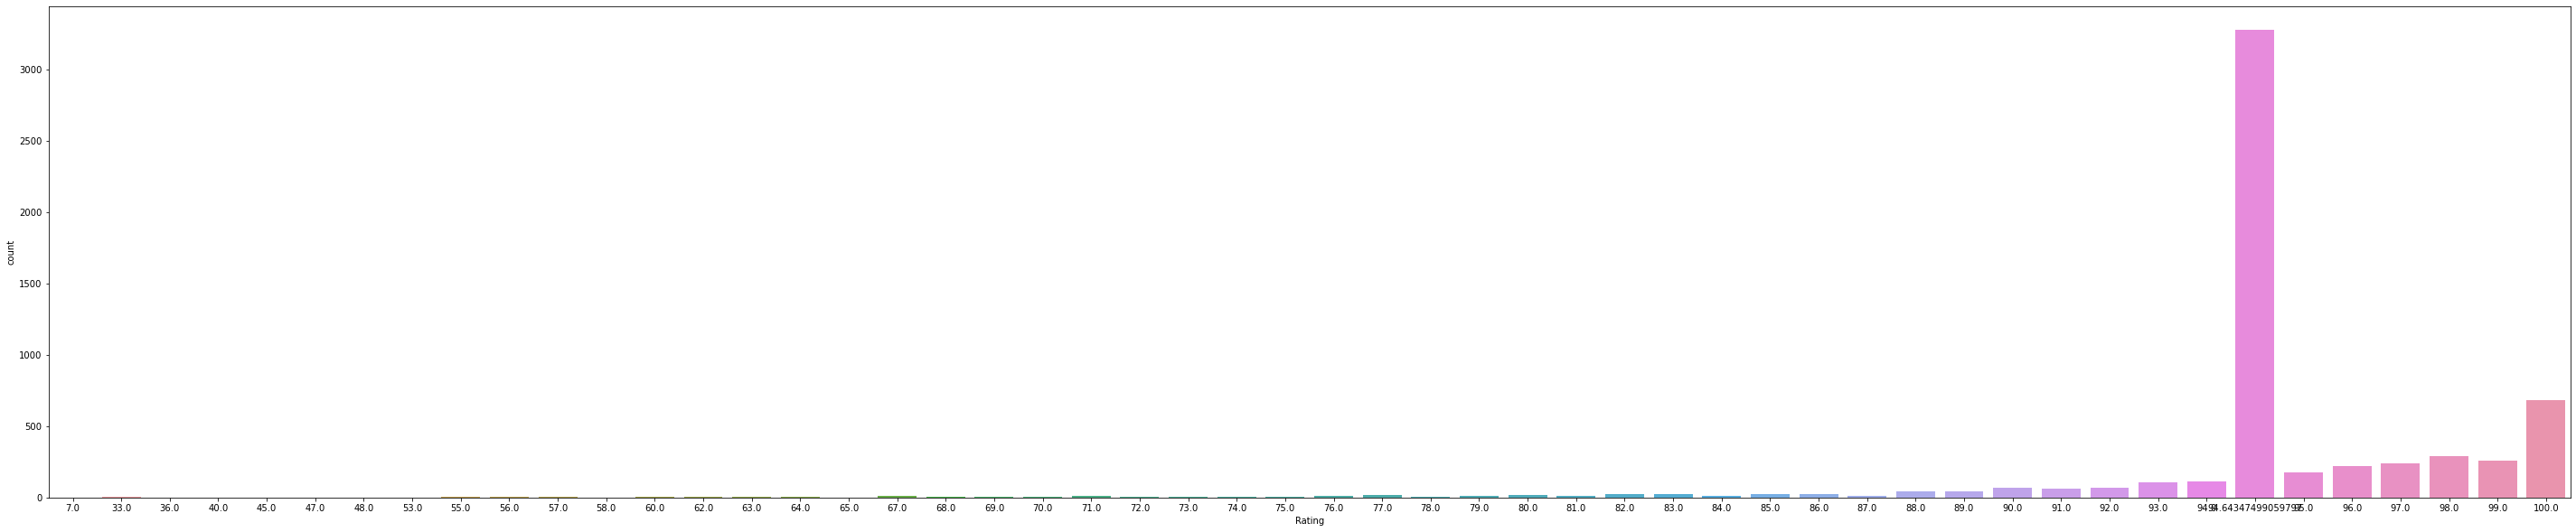

In [65]:
plt.figure(figsize=(50,10))
sns.countplot(df["Rating"])

###### Observation:

    More number of doctors received ratings between 94-95%

### CountPlot for Profile

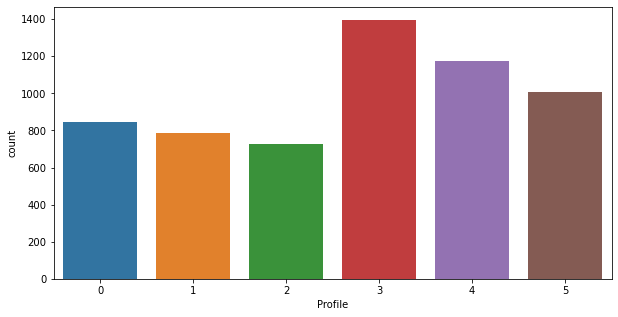

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(df["Profile"])

###### Observation:

    Doctor with Profile "Dentist" are found more in our dataset
    
    The least has been doctor with Profile "ENT Specialist"  

### CountPlot for Fees

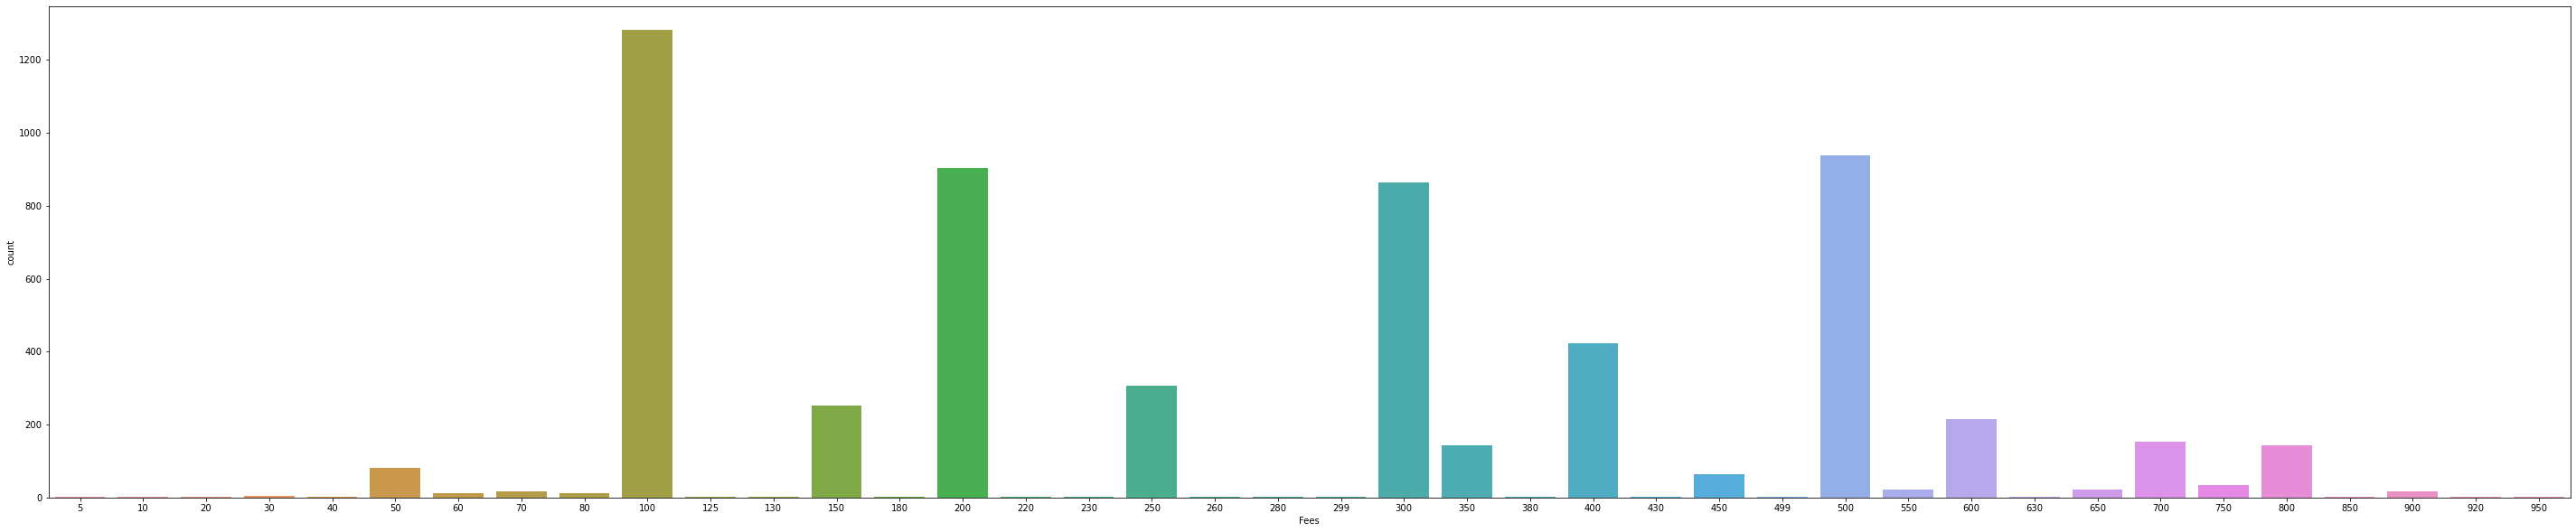

In [67]:
plt.figure(figsize=(50,10))
sns.countplot(df["Fees"])

###### Observation:

    Most number of Doctors charges fees of Rupees 100

### CountPlot for city

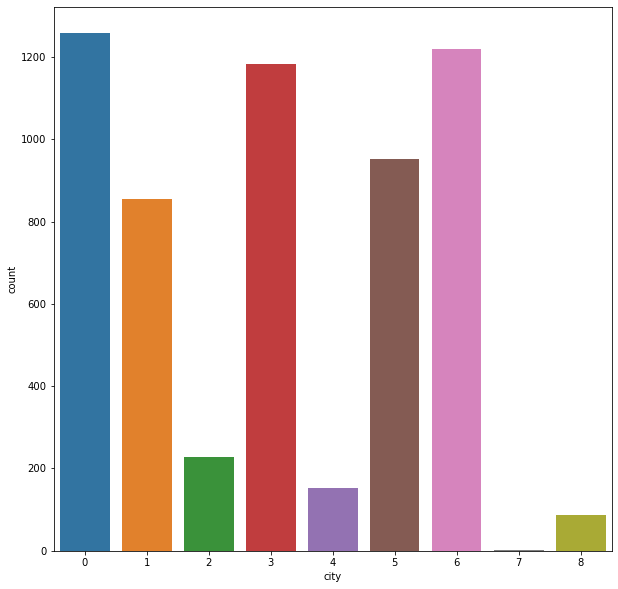

In [68]:
plt.figure(figsize=(10,10))
sns.countplot(df["city"])

###### Observation:

    "0" represents "Banglore"
    
    "1" represents "chennai"
    
    "2" represents "coimbatore"
    
    "3" represents "Delhi"
    
    "4" represents "Ernakulam"
    
    "5" represents "Hydrabad"
    
    "6" represents "Mumbai"
    
    "7" represents "sector 5"
    
    "8" represents "Thiruvananthapuram"
    
  we find more number of doctors were available in city Banglore
  
  we find less number of doctors were available in city sector 5
    

### CountPlot for Experience

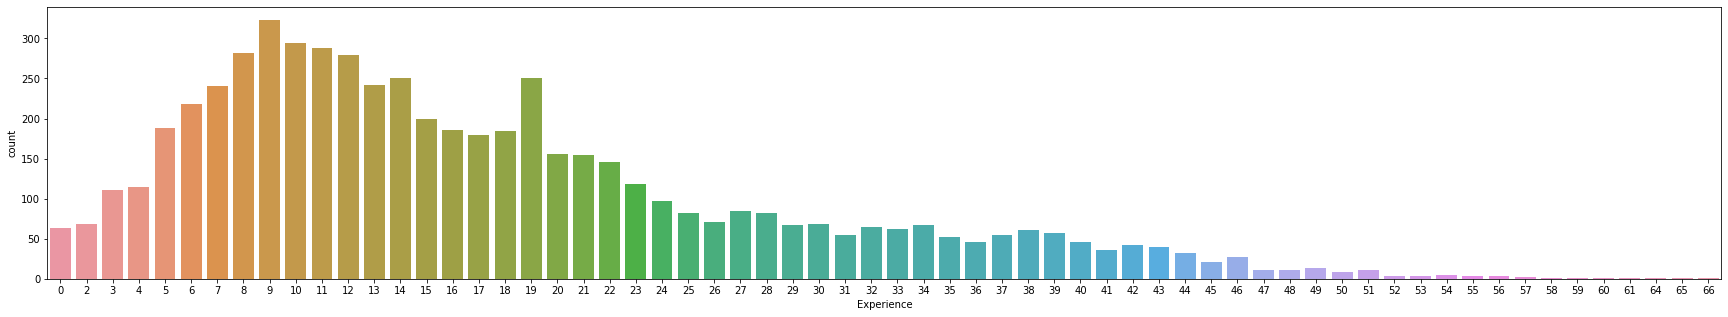

In [69]:
plt.figure(figsize=(30,5))
sns.countplot(df["Experience"])

###### Observation:
    
    most of the Doctors are having experience between 5 to 15 years
    
    There are around 300 Doctors with experience of 9 Years

### Displacement for Experience

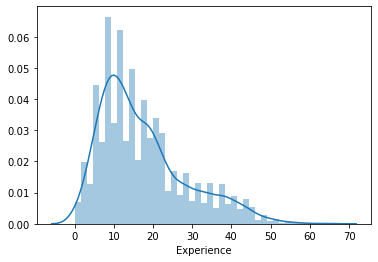

In [70]:
sns.distplot(df["Experience"])

###### Observation:
    
    the displacement graph shows that the column Experience is right distributed which means it is positively skewed

## Bivariate Analysis

In [71]:
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
cf.go_offline()

### Bar chart between Qualification1,Qualification2 & Fees

In [72]:
df.iplot(kind="bar",x="Qualification1",y="Fees")

In [73]:
df.iplot(kind="bar",x="Qualification2",y="Fees")

###### Observation:
    
    we find that doctors with  major Qualification 
    
    "MBBS" and 
    
    "MS-ENT"
    
    receives high amount of fees in total when compared with other Qualified doctor

### Bar chart between Rating & Fees

In [74]:
df.iplot(kind="bar",x="Rating",y="Fees")

###### Observation:

    The Doctors with Ratings around 95% receives high amount of Fees in total when compared with Doctors

### Bar chart between Experience & Fees

In [75]:
df.iplot(kind="bar",x="Experience",y="Fees")

###### observation:

    Doctors who were with experience of around 9 to 10 years in the field receives high amunt of fees in total when compared with other experienced doctor

### Bar chart between Profile & Fees

In [76]:
df.iplot(kind="bar",x="Profile",y="Fees")

###### OBservation:

    Doctor with profile Dermatologists receives high amount of fees in total when compared with other Profile

### Bar chart between city & Fees

In [77]:
df.iplot(kind="bar",x="city",y="Fees")

###### Observation:

    "0" represents "Banglore"
    
    "1" represents "chennai"
    
    "2" represents "coimbatore"
    
    "3" represents "Delhi"
    
    "4" represents "Ernakulam"
    
    "5" represents "Hydrabad"
    
    "6" represents "Mumbai"
    
    "7" represents "sector 5"
    
    "8" represents "Thiruvananthapuram"
    
  Doctors in city Delhi receives more amount of fees in total when compared with Doctorsors from other cities
    

# LabelEncoding Columns

In [78]:
#LabelEncoding the column Qualification1 nd Qualification2
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Qualification1"]=le.fit_transform(df["Qualification1"])
df["Qualification2"]=le.fit_transform(df["Qualification2"])



In [79]:
df.head()

,Experience,Rating,Profile,Fees,city,Qualification1,Qualification2
0,24,100.000000,0,100,4,8,252
1,12,98.000000,1,350,0,5,241
2,9,94.643475,2,300,0,78,334
3,12,94.643475,1,250,0,12,7
4,20,100.000000,1,250,1,5,426


# Correlation

In [80]:
cor=df.corr()
cor

,Experience,Rating,Profile,Fees,city,Qualification1,Qualification2
Experience,1.000000,-0.178316,0.091287,-0.004672,0.029754,0.205704,-0.039285
Rating,-0.178316,1.000000,-0.062440,-0.090329,0.025233,-0.183298,0.042051
Profile,0.091287,-0.062440,1.000000,0.133099,-0.027652,0.528864,-0.276328
Fees,-0.004672,-0.090329,0.133099,1.000000,-0.030842,0.236375,-0.173674
city,0.029754,0.025233,-0.027652,-0.030842,1.000000,-0.030432,0.030080
Qualification1,0.205704,-0.183298,0.528864,0.236375,-0.030432,1.000000,-0.419576
Qualification2,-0.039285,0.042051,-0.276328,-0.173674,0.030080,-0.419576,1.000000


For better Understanding we can see it via Visuvalization

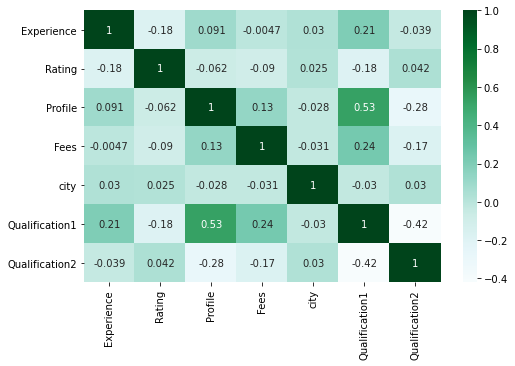

In [81]:
#Heatmap 
plt.figure(figsize=(8,5))
sns.heatmap(cor,annot=True,cmap="BuGn")

###### KEY OBSERVATION:

from the above result it is clear that some columns making positive correlation while some has negative correlation to the target variable 

columns making positive correlation

1)Qualification1

2)Profile

columns making negative correlation

1)Experience

2)Rating

3)city

4)Qualification2

                 
                  



    

Text(0.5, 1.0, 'correlation with Target Variable')

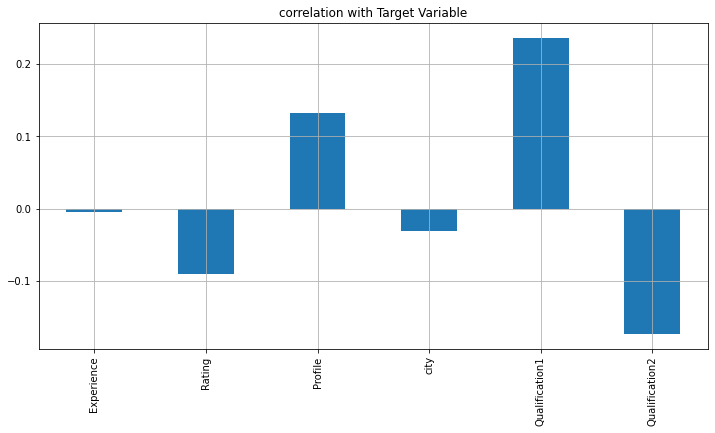

In [82]:
#correlation with Target
plt.figure(figsize=(12,6))
df.drop("Fees",axis=1).corrwith(df["Fees"]).plot(kind="bar",grid=True)
plt.xticks(rotation="vertical")
plt.title("correlation with Target Variable")


# DATA CLEANING

## Finding Skewness

In [83]:
#checking for skewness
df.skew()

Experience        1.000495
Rating           -4.895516
Profile          -0.260508
Fees              0.747349
city              0.046030
Qualification1    0.079316
Qualification2   -0.606286
dtype: float64

###### Observation:

    Skewness threshold value +/-0.5

   columns with Positive Skewness
    
    1)Experience
    
    2)Fees
    
   columns with Negative Skewness
   
    1)Rating
    
    2)Qualification2
    
    we will remove skew after spliting the test and train data
    
    

## finding outliers

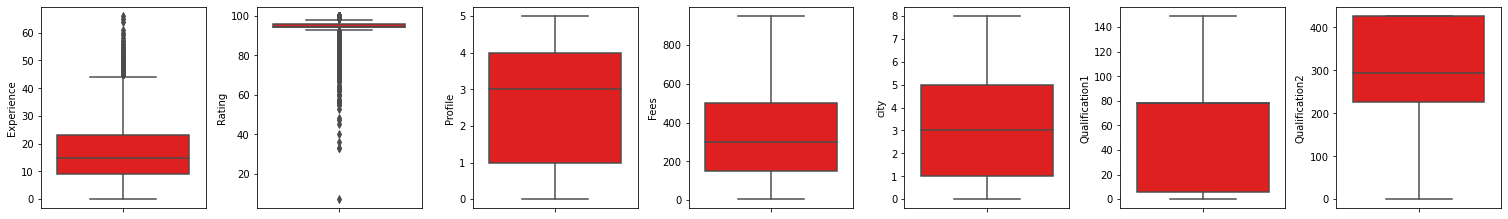

In [84]:
#Plotting Outliers
collist=df.columns.values
ncol=30
nrow=30
plt.figure(figsize=(3*nrow,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="red",orient="v")
    plt.tight_layout()   

###### Observation:

Outliers present in 

1)Experience

2)Rating



## Treating Outliers

In [85]:
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df))
z


array([[5.96493655e-01, 1.01927355e+00, 1.64796569e+00, ...,
        3.98967454e-01, 1.01047572e+00, 2.69801971e-01],
       [4.83491043e-01, 6.38700866e-01, 1.04298787e+00, ...,
        1.32280811e+00, 1.08751103e+00, 3.53323101e-01],
       [7.53487218e-01, 2.70413156e-15, 4.38010056e-01, ...,
        1.32280811e+00, 7.87014905e-01, 3.52810089e-01],
       ...,
       [2.12647198e+00, 4.48414524e-01, 7.71945578e-01, ...,
        3.14764361e-02, 7.87014905e-01, 1.05135045e+00],
       [2.13494869e-01, 8.83589870e-01, 7.71945578e-01, ...,
        1.25985523e+00, 7.87014905e-01, 2.92580461e-01],
       [3.34974192e-02, 1.01927355e+00, 1.66967761e-01, ...,
        3.14764361e-02, 1.06183260e+00, 3.39112291e-02]])

In [86]:
threshold=3
print(np.where(z>3))

(array([  55,   67,  104,  109,  139,  177,  182,  208,  274,  292,  308,
        324,  332,  371,  376,  457,  464,  583,  588,  628,  688,  726,
        782,  783,  810,  896,  906,  913,  963,  974,  982,  985,  993,
       1003, 1012, 1104, 1163, 1232, 1295, 1306, 1384, 1417, 1425, 1436,
       1467, 1586, 1606, 1623, 1640, 1709, 1733, 1739, 1770, 1788, 1844,
       1852, 1869, 1973, 2015, 2054, 2080, 2152, 2156, 2192, 2242, 2252,
       2267, 2271, 2299, 2313, 2380, 2382, 2417, 2467, 2489, 2511, 2537,
       2574, 2612, 2620, 2635, 2659, 2697, 2704, 2715, 2727, 2747, 2818,
       2822, 2951, 2980, 3082, 3108, 3114, 3132, 3168, 3210, 3241, 3257,
       3320, 3352, 3354, 3448, 3463, 3478, 3511, 3522, 3578, 3589, 3593,
       3600, 3612, 3646, 3661, 3750, 3767, 3803, 3844, 3925, 3943, 4021,
       4036, 4039, 4116, 4148, 4155, 4193, 4193, 4200, 4238, 4325, 4440,
       4455, 4459, 4490, 4562, 4589, 4590, 4593, 4711, 4743, 4755, 4788,
       4804, 4814, 4822, 4829, 4858, 4949, 5006, 5

In [87]:
df.shape

(5935, 7)

In [88]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(5754, 7)

In [89]:
#Percentage loss
loss=(5935-5754)/5935*100
loss

3.0497051390058973

###### Observation:

The Outliers loss percentange is minimal.so proceeding further

# Seperating Target Variable


In [90]:
x_l=df_new.drop(["Fees"],axis=1)
y=df_new["Fees"]

In [91]:
x_l.head()

,Experience,Rating,Profile,city,Qualification1,Qualification2
0,24,100.000000,0,4,8,252
1,12,98.000000,1,0,5,241
2,9,94.643475,2,0,78,334
3,12,94.643475,1,0,12,7
4,20,100.000000,1,1,5,426


In [92]:
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

# Removing Skewness

In [93]:
#Skewness treatment
#treating using log
threshold=0.55
import numpy as np
for i in x_l.columns:
    if x_l[i].skew()>0.65:
        x_l[i]=np.log1p(x_l[i])
    

In [94]:
#Rechecking
x_l.skew()

Experience       -0.801910
Rating           -1.537032
Profile          -0.245805
city              0.043763
Qualification1    0.127715
Qualification2   -0.619996
dtype: float64

# Scaling Input Variable

In [95]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_l)
x


array([[ 0.78766693,  1.53142294, -1.63226201,  0.39576573, -0.98478561,
        -0.27569218],
       [-0.19476155,  0.8899661 , -1.02842791, -1.32485083, -1.06155368,
        -0.3589722 ],
       [-0.58892533, -0.18656687, -0.42459381, -1.32485083,  0.80646949,
         0.34512246],
       ...,
       [ 1.56707841,  0.56923768,  0.78307439, -0.03438841,  0.80646949,
         1.0416462 ],
       [ 0.1171861 , -1.67586127,  0.78307439,  1.25607401,  0.80646949,
        -0.29840491],
       [ 0.29413781,  1.53142294,  0.17924029, -0.03438841, -1.03596432,
         0.02714423]])

# Preparing dataset for model training


## splitting the testing and training data

In [96]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15,random_state=42)

In [98]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4890, 6), (864, 6), (4890,), (864,))

# finding best model

1)

In [99]:
#importing our model libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
lr=LinearRegression()
ls=Lasso()
rd=Ridge()
en=ElasticNet()
from sklearn.svm import SVR
svr=SVR()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
#importing error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


## using Algorithms via for loop

In [100]:
#using Algorithms via for loop
model=[lr,svr,knn,ls,rd,en]
for m in model:
    m.fit(x_train,y_train)
    print("score of ",m,"is",m.score(x_train,y_train)*10)
    predm=m.predict(x_test)
    print("r2_score is :",r2_score(y_test,predm)*10)
    print("error")
    print("mean_absolute_error is :",mean_absolute_error(y_test,predm))
    print("mean_squared_error is :",mean_squared_error(y_test,predm))
    print("root mean_absolute_error is :",np.sqrt(mean_squared_error(y_test,predm)))
    
    print("**********************************************************")
    print("\n\n")
    
    

score of  LinearRegression() is 0.6188205367085342
r2_score is : 0.7365635215521937
error
mean_absolute_error is : 146.71052757611182
mean_squared_error is : 31900.31607845474
root mean_absolute_error is : 178.6065958425241
**********************************************************



score of  SVR() is 0.4800155017100882
r2_score is : 0.719580299899536
error
mean_absolute_error is : 140.03393583069416
mean_squared_error is : 31958.80086863069
root mean_absolute_error is : 178.77024603840172
**********************************************************



score of  KNeighborsRegressor() is 3.5635521052293306
r2_score is : -0.09870468585102987
error
mean_absolute_error is : 145.30092592592592
mean_squared_error is : 34776.71296296296
root mean_absolute_error is : 186.485154805853
**********************************************************



score of  Lasso() is 0.6176645052232232
r2_score is : 0.7360308253575754
error
mean_absolute_error is : 146.8709967551205
mean_squared_error is : 31902

# Ensemble Technique to boostup our score

In [101]:
#using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("score is",rf.score(x_train,y_train))
print("r2 score is",r2_score(y_test,rf_pred))
print("mean absolute error is : ",mean_absolute_error(y_test,rf_pred))
print("mean squared error is : ",mean_squared_error(y_test,rf_pred))
print("root mean absolute error is : ",np.sqrt(mean_absolute_error(y_test,rf_pred)))

score is 0.7980090445914441
r2 score is 0.04522673876401029
mean absolute error is :  140.5830379278832
mean squared error is :  32879.34114682743
root mean absolute error is :  11.856771817315336


In [102]:
#using AdaBoost
from sklearn.ensemble import AdaBoostRegressor
lr=LinearRegression()
ada=AdaBoostRegressor(base_estimator=lr,n_estimators=20,learning_rate=0.1,random_state=5)
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
ada_score=ada.score(x_train,y_train)
print("score is",ada_score*10)
print("r2 score is",r2_score(y_test,ada_pred)*10)
print("mean absolute error is : ",mean_absolute_error(y_test,ada_pred))
print("mean squared error is : ",mean_squared_error(y_test,ada_pred))
print("root mean absolute error is : ",np.sqrt(mean_absolute_error(y_test,ada_pred)))




score is 0.5862450397943986
r2 score is 0.6353960537802494
mean absolute error is :  149.00550037017854
mean squared error is :  32248.704520075782
root mean absolute error is :  12.206780917595701


###### Observation:

we observe RandomForest Regressor Performs well.

from above it is clear that the ensemble technique overfits the Linear model

### HyperTuning

    

In [103]:
#Hyper parameter Tuning
#RandomForestRegressor
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={"n_estimators" :[1,10,100,1000], "random_state": list(range(0,10))}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 1000, 'random_state': 8}


In [104]:
#using RandomForestRegressor with best Result
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=8,n_estimators=1000)
rf.fit(x_train,y_train)
rf_test_pred=rf.predict(x_test)
rf_train_pred=rf.predict(x_train)
rf_test_acc=r2_score(y_test,rf_test_pred)
rf_train_acc=r2_score(y_train,rf_train_pred)
print("training accuracy : ",rf_train_acc*100)
print("final accuracy : ",rf_test_acc*100)


training accuracy :  80.0843480249825
final accuracy :  4.215740463162875


In [105]:
#cross validating 
#Random forest classifier
#cross-validating for checking upper/lower cutting
from sklearn.model_selection import cross_val_score
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
accuracy=r2_score(y_test,pred_test)
for i in range(2,10):
    cr=cross_val_score(rf,x,y,cv=i)
    cross=cr.mean()
    print("At cv : ",i,"\ncross val score is : ",cross*100,"\nr2_score is: ",accuracy*100)
    print("******************************************************************************")
    print("\n\n")

        



At cv :  2 
cross val score is :  6.460531827784521 
r2_score is:  4.215740463162875
******************************************************************************



At cv :  3 
cross val score is :  5.7644687467172435 
r2_score is:  4.215740463162875
******************************************************************************



At cv :  4 
cross val score is :  6.581516438958454 
r2_score is:  4.215740463162875
******************************************************************************



At cv :  5 
cross val score is :  5.696226962130339 
r2_score is:  4.215740463162875
******************************************************************************



At cv :  6 
cross val score is :  7.2095089996929484 
r2_score is:  4.215740463162875
******************************************************************************



At cv :  7 
cross val score is :  5.9266610379786355 
r2_score is:  4.215740463162875
*****************************************************************************

# Saving Model

In [106]:
import pickle
filename="doctor_consultation_fees.pkl"
pickle.dump(rf,open(filename,"wb"))


# USING THE TEST DATASET

In [107]:
#loading test data
df_test=pd.read_excel(r"C:\Users\arunp\Desktop\Final Participant Data Folder\final_test.xlsx")
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [108]:
df_test.shape

(1987, 6)

In [109]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [110]:
df_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [111]:
df_test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

# Finding Missing values

In [112]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

###### Observation:
    
    we find missing values in column
    
    1)Rating
    
    2)Place
    
    3)Miscellaneous_info
    
    now we will fill the Nan with appropriate values

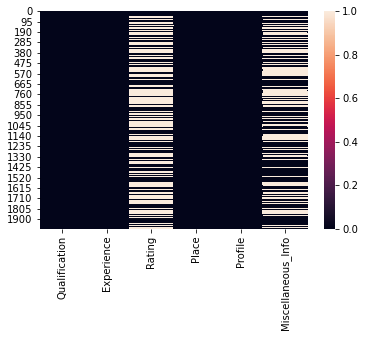

In [113]:
#Graphical Visuvalization of Missing values
sns.heatmap(df_test.isnull())

# Filling NAN values

## Column Rating

In [114]:
df_test["Rating"].value_counts()

100%    223
98%     112
97%      84
99%      68
96%      65
94%      51
95%      47
93%      34
92%      29
90%      29
91%      26
88%      13
89%      11
87%      11
83%      11
82%       9
85%       8
71%       7
80%       7
84%       7
86%       6
67%       5
73%       5
70%       4
60%       4
76%       4
55%       3
81%       3
64%       2
79%       2
69%       2
65%       1
77%       1
53%       1
78%       1
52%       1
Name: Rating, dtype: int64

In [115]:
df_test["Rating"].isnull().sum()

1090

###### Observation:
    
    Nearly 50% Datas are missing in column "Rating"
    
    The Datatype of Column Rating is of Object Type
    
    Dropping of Missing Column will result in huge loss of Data
    
    so we fill the missing value of column Rating with mean value
    
steps:

    1)At fisrt we need to strip of "%"
    
    2)converting Rating column to datatype Float
    
    3)filling NaN values with mode value6

In [116]:
df_test["Rating"]

0        NaN
1        NaN
2        70%
3        NaN
4       100%
        ... 
1982     NaN
1983     NaN
1984     NaN
1985     98%
1986     NaN
Name: Rating, Length: 1987, dtype: object

In [117]:
#At fisrt we need to strip of "%"
df_test["Rating"]=df_test["Rating"].str.strip("%")

In [118]:
#converting Rating column to datatype Float
df_test["Rating"]=df_test["Rating"].astype(float)

In [119]:
df_test["Rating"].mean()

94.44147157190635

In [120]:
#filling NaN values with mode value
df_test["Rating"].fillna(df_test["Rating"].mean(),inplace=True)

In [121]:
df_test.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Place                   6
Profile                 0
Miscellaneous_Info    834
dtype: int64

## column Miscellaneous_info

In [122]:
df_test["Miscellaneous_Info"].value_counts().head()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth             10
Skin Allergy Treatment Skin Allergies Dermabrasion                              9
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                         6
Balance Exercises Acne / Pimples Treatment Insulin Treatment                    4
Crowns and Bridges Fixing Complete/Partial Dentures Fixing Tooth Extraction     4
Name: Miscellaneous_Info, dtype: int64

In [123]:
df_test["Miscellaneous_Info"].isnull().sum()

834

In [124]:
df_test["Miscellaneous_Info"].shape

(1987,)

###### Observation:
    
    Nearly 50% Datas are missing in column "Miscellaneous_Info"
    
    The Datatype of Column "Miscellaneous_Info" is of Object Type
    
    Dropping of Missing Column will result in huge loss of Data
    
    so we fill the missing value of column Rating with "missing"

In [125]:
#Filling Nan values with "missing" in column Miscellaneous_Info
df_test["Miscellaneous_Info"].fillna("missing",inplace=True)

In [126]:
#Rechecking null values in column Miscellaneous_Info
df_test["Miscellaneous_Info"].isnull().sum()

0

## Column Place

In [127]:
df_test["Place"].value_counts()

Andheri West, Mumbai         27
Mulund West, Mumbai          27
Dwarka, Delhi                26
Whitefield, Bangalore        23
HSR Layout, Bangalore        22
                             ..
Nanjundapuram, Coimbatore     1
Bandra East, Mumbai           1
Mulund, Mumbai                1
Hongasandra, Bangalore        1
Mandaveli, Chennai            1
Name: Place, Length: 592, dtype: int64

In [128]:
df_test["Place"].isnull().sum()

6

In [129]:
df_test["Place"].shape

(1987,)

###### Observation:
    
    very low amount of Datas are missing in column "Place"
    
    The Datatype of Column Place is of Object Type
    
    Dropping of Missing Column will not result in huge loss of Data
    
    so we drop the missing value 

In [130]:
#Dropping missing values in column Place
df_test.dropna(inplace=True)

In [131]:
#Rechecking missing values
df_test.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

###### Observation:
    
    we cleared all NaN values

# Data Pre-Processing

## Exlporing columns of Data type Object

In [132]:
df_test.dtypes

Qualification          object
Experience             object
Rating                float64
Place                  object
Profile                object
Miscellaneous_Info     object
dtype: object

###### observation:
    
    column with datatype object
    
    1)Qualification          object
    
    2)Experience             object
    
    3)Place                  object
    
    4)Profile                object
    
    5)Miscellaneous_Info     object

### column Experience

In [133]:
df_test["Experience"].unique()

array(['35 years experience', '31 years experience',
       '40 years experience', '0 years experience', '16 years experience',
       '14 years experience', '23 years experience', '9 years experience',
       '11 years experience', '44 years experience', '4 years experience',
       '34 years experience', '13 years experience',
       '28 years experience', '6 years experience', '32 years experience',
       '3 years experience', '8 years experience', '43 years experience',
       '27 years experience', '22 years experience',
       '25 years experience', '36 years experience',
       '17 years experience', '20 years experience',
       '18 years experience', '29 years experience', '5 years experience',
       '19 years experience', '10 years experience', '2 years experience',
       '30 years experience', '24 years experience',
       '26 years experience', '41 years experience',
       '46 years experience', '21 years experience',
       '12 years experience', '45 years experience',

###### Observation:
    
    we see that Experience column is filled with both integer and string values
    
    All we need is the Integer value .
    
    so At fisrt we need to strip of "years experience"
    
    Then We can convert experience column to datatype int

In [134]:
#strip of " years experience"
df_test["Experience"]=df_test["Experience"].str.strip(" years experience")

In [135]:
#converting experience column to datatype int
df_test["Experience"]=df_test["Experience"].astype(int)

### column Profile

In [136]:
df_test["Profile"].unique()

array(['General Medicine', 'ENT Specialist', 'Dermatologists', 'Ayurveda',
       'Dentist', 'Homeopath'], dtype=object)

In [137]:
df_test["Profile"].value_counts()

General Medicine    444
Dentist             441
Dermatologists      333
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

###### Obesrvation:
    
    The column profile is of type object. 
    
    so we first replace the string value to numeric
    
    then convert the type object to type integer

In [138]:
#converting object type to integer
df_test["Profile"]=df_test["Profile"].map({'Homeopath':0,"Ayurveda":1,"ENT Specialist":2,"Dentist":3,"General Medicine":4,"Dermatologists":5})

### column Miscellaneous_Info

In [139]:
df_test["Miscellaneous_Info"].unique()

array(['missing', '70% 4 Feedback KK Nagar, Chennai',
       'General Dentistry Conservative Dentistry Cosmetic/ Aesthetic Dentistry',
       ..., '98% 240 Feedback Velachery, Chennai',
       'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment',
       '1 Feedback Pallikaranai, Chennai ₹500'], dtype=object)

In [140]:
df_test["Miscellaneous_Info"].value_counts()

missing                                                                       828
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth             10
Skin Allergy Treatment Skin Allergies Dermabrasion                              9
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                         6
Balance Exercises Acne / Pimples Treatment Insulin Treatment                    4
                                                                             ... 
Viral Fever Treatment Dengue Fever Treatment Typhoid Fever Treatment            1
95% 18 Feedback Whitefield, Bangalore                                           1
Manapakkam, Chennai ₹600 Visits Today                                           1
100% 7 Feedback Malad West, Mumbai                                              1
Dental Implant Fixing Cosmetic/ Aesthetic Dentistry Full Denture (Acrylic)      1
Name: Miscellaneous_Info, Length: 1085, dtype: int64

###### Observation:

Missing data is high in column Miscellaneous_Info

we can clearly see the Miscellaneous_Info is not gonna help much in predicting the doctors fee.

so dropping column Miscellaneous_Info is recommended

In [141]:
#Dropping column Miscellaneous_Info
df_test.drop("Miscellaneous_Info",axis=1,inplace=True)

### column place

In [142]:
df_test["Place"].unique()

array(['Ghatkopar East, Mumbai', 'West Marredpally, Hyderabad',
       'KK Nagar, Chennai', 'New Ashok Nagar, Delhi',
       'Kanakpura Road, Bangalore', 'Velachery, Chennai',
       'Frazer Town, Bangalore', 'Attapur, Hyderabad',
       'Banashankari, Bangalore', 'Mayur Vihar Ph-I, Delhi',
       'Erragadda, Hyderabad', 'Gandhipuram, Coimbatore',
       'Kemps Corner, Mumbai', 'Banjara Hills, Hyderabad',
       'Madandapuram, Chennai', 'Mukherjee Nagar, Delhi',
       'Tis Hazari, Delhi', 'Banashankari 2nd Stage, Bangalore',
       'Nagawara, Bangalore', 'Basavanagudi, Bangalore', 'Dadar, Mumbai',
       'Kattakada, Thiruvananthapuram', 'Villivakkam, Chennai',
       'Begumpet, Hyderabad', 'Kottivakkam, Chennai',
       'Jeedimetla, Hyderabad', 'Gachibowli, Hyderabad',
       'Chromepet, Chennai', 'Mulund West, Mumbai',
       'Bellandur, Bangalore', 'Kukatpally, Hyderabad',
       'Chandni Chowk, Delhi', 'Vileparle West, Mumbai',
       'Sakinaka, Mumbai', 'Bannerghatta Road, Bangalo

In [143]:
df_test["Place"].value_counts()

Andheri West, Mumbai         27
Mulund West, Mumbai          27
Dwarka, Delhi                26
Whitefield, Bangalore        23
HSR Layout, Bangalore        22
                             ..
Nanjundapuram, Coimbatore     1
Bandra East, Mumbai           1
Mulund, Mumbai                1
Hongasandra, Bangalore        1
Mandaveli, Chennai            1
Name: Place, Length: 592, dtype: int64

###### Observation

we can say that column Place may be correlated to the doctors fees in some ways.

All the values are of type Object.

we observe that the place value is filled with locality and city.

so we split the place with locality and area as saperate columns

In [144]:
#Seperating place into "locality" and "city"
df_test['locality'] = df_test['Place'].str.split(",").str[0]
df_test['city'] = df_test['Place'].str.split(",").str[1]


###### Observation:
    
    we seperated column "Place" into "locality" and "city".
    
    now Column Place is no more needed. so droping of column "place" to be done
     
    By observing column Locality and city,we conclude that 
    
    1)column city and locality represent same. so
    
    2)Column locality doesnt help much in predicting our target.
    
    so dropping of column "locality" is to be done

In [145]:
#Dropping column "Place" 
df_test.drop("Place",axis=1,inplace=True)

In [146]:
#Dropping column "locality"
df_test.drop("locality",axis=1,inplace=True)

### exploring column city

In [147]:
df_test["city"].value_counts()


 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Name: city, dtype: int64

In [148]:
#Datatype of column city
df_test["city"].dtypes

dtype('O')

In [149]:
#finding Null value
df_test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
city             0
dtype: int64

###### Observation:
    
    1)The city is of datatype object
    
     So converting it into numeric have to be done
    
    2)we find missing value in column city
    
     so dropping of missing column have to be done

In [150]:
#droping Nan values in column city
df_test.dropna(inplace=True)

In [151]:
#Rechecking missing value
df_test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
city             0
dtype: int64

In [152]:
df_test["city"].unique()

array([' Mumbai', ' Hyderabad', ' Chennai', ' Delhi', ' Bangalore',
       ' Coimbatore', ' Thiruvananthapuram', ' Ernakulam'], dtype=object)

In [153]:
#converting Dtype of column city from object to integer
#using Label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test["city"]=le.fit_transform(df_test["city"])
df_test

,Qualification,Experience,Rating,Profile,city
0,MBBS,35,94.441472,4,6
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,94.441472,2,5
2,"MBBS, DDVL",40,70.000000,5,1
3,BAMS,0,94.441472,1,3
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.000000,3,0
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,94.441472,1,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,94.441472,5,1
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,94.441472,4,1
1985,BDS,12,98.000000,3,0


###### Observation:

    "0" represents "Banglore"
    
    "1" represents "chennai"
    
    "2" represents "coimbatore"
    
    "3" represents "Delhi"
    
    "4" represents "Ernakulam"
    
    "5" represents "Hydrabad"
    
    "6" represents "Mumbai"
    
    "7" represents "sector 5"
    
    "8" represents "Thiruvananthapuram"

### column Qualification

In [154]:
df_test["Qualification"].unique()

array(['MBBS', 'MBBS, Diploma in Otorhinolaryngology (DLO)', 'MBBS, DDVL',
       'BAMS', 'BDS, MDS - Conservative Dentistry & Endodontics',
       'BDS, MDS', 'BDS, MDS - Pedodontics',
       'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA',
       'BHMS', 'BDS', 'MBBS, FCD - Diabetology', 'MBBS, DDV',
       'MBBS, MD - Dermatology', 'MS - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)',
       'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology',
       'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)',
       'BDS, MDS - Periodontics', 'BDS, MDS- Oral Pathology',
       'MBBS, MD - General Medicine', 'MS - ENT, MBBS',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, MS - ENT, DNB - Otorhinolaryngology',
       'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics',
       'B

In [155]:
df_test["Qualification"].nunique()

629

In [156]:
df_test["Qualification"].value_counts()

BAMS                                                                                                                                         153
BHMS                                                                                                                                         150
BDS                                                                                                                                          144
MBBS                                                                                                                                         107
MBBS, MD - Dermatology                                                                                                                        64
                                                                                                                                            ... 
MBBS, MD - Internal Medicine, DNB - General Medicine, Post Graduate Diploma in Diabetology (PGDD)                                 

In [157]:
df_test["Qualification"].value_counts().sum()

1981

In [158]:
Qualification = list(df_test['Qualification'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in Qualification :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Qualification in a Cell : ", maxim)    



Maximum Qualification in a Cell :  17


###### Observation:
    
    Maximum number of Qualification mentioned in a single cell is 10
    
    And the data is to much messy like, 'MBA -Healthcare' and ‘MBA’ which referred to same category .
    
    so we go with major Degree in qualification column
    
    most of the major degree are in 1st two of each cell

In [159]:
df_test['Qualification1'] = df_test['Qualification'].str.split(",").str[0]
df_test['Qualification2'] = df_test['Qualification'].str.split(",").str[1]



In [160]:
df_test

,Qualification,Experience,Rating,Profile,city,Qualification1,Qualification2
0,MBBS,35,94.441472,4,6,MBBS,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,94.441472,2,5,MBBS,Diploma in Otorhinolaryngology (DLO)
2,"MBBS, DDVL",40,70.000000,5,1,MBBS,DDVL
3,BAMS,0,94.441472,1,3,BAMS,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.000000,3,0,BDS,MDS - Conservative Dentistry & Endodontics
...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,94.441472,1,0,BAMS,Doctor of Medicine
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,94.441472,5,1,MD - Dermatology,Venereology & Leprosy
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,94.441472,4,1,MBBS,MD / MS - Obstetrics & Gynaecology
1985,BDS,12,98.000000,3,0,BDS,NaN


In [161]:
df_test["Qualification1"].nunique(),df_test["Qualification2"].nunique()

(86, 243)

In [162]:
#Dropping column Qualification
df_test.drop("Qualification",axis=1,inplace=True)

### column Qualification1 and Qualification 2

###### Observation:

    from column Qualification1 and Qualification1 we see Missing values
    
    filling NaN values with word Missing

In [163]:
#finding nan values
df_test.isnull().sum()

Experience          0
Rating              0
Profile             0
city                0
Qualification1      0
Qualification2    603
dtype: int64

###### Processing column Qualification1 and Qualification2:

     1)filling NaN values in column Qualification2 with word "missing"
     
     2)since the data type of column Qualification1 and Qualification2 is object we convert both into numeric using label encoding
     
     

In [164]:
#Filling column Qualification with "missing"
df_test["Qualification2"].fillna("missing",inplace=True)

In [165]:
#rechecking missing value
df_test.isnull().sum()

Experience        0
Rating            0
Profile           0
city              0
Qualification1    0
Qualification2    0
dtype: int64

In [166]:
#LabelEncoding the column Qualification1 nd Qualification2
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test["Qualification1"]=le.fit_transform(df_test["Qualification1"])
df_test["Qualification2"]=le.fit_transform(df_test["Qualification2"])

In [167]:
df.head()

,Experience,Rating,Profile,Fees,city,Qualification1,Qualification2
0,24,100.000000,0,100,4,8,252
1,12,98.000000,1,350,0,5,241
2,9,94.643475,2,300,0,78,334
3,12,94.643475,1,250,0,12,7
4,20,100.000000,1,250,1,5,426


# DATA CLEANING

## finding outliers

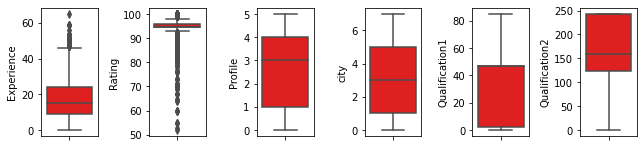

In [168]:
#Plotting Outliers
collist=df_test.columns.values
ncol=30
nrow=15
plt.figure(figsize=(3*nrow,ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df_test[collist[i]],color="red",orient="v")
    plt.tight_layout()               

###### Observation:

Outliers present in 

1)Estimated_Insects_Count

2)Crop_Type

3)Number_Doses_Week
        
4)Number_Weeks_Used

5)Number_Weeks_Quit
      

## Treating Outliers

In [169]:
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df_test))
z


array([[1.50561022e+00, 2.78857071e-15, 7.45568873e-01, 1.31531564e+00,
        7.59311143e-01, 1.11288199e+00],
       [1.15282604e+00, 2.78857071e-15, 4.65560227e-01, 8.73531937e-01,
        7.59311143e-01, 1.03116782e+00],
       [1.94659045e+00, 4.79610644e+00, 1.35113342e+00, 8.93602878e-01,
        7.59311143e-01, 1.69791502e+00],
       ...,
       [7.87486949e-01, 2.78857071e-15, 7.45568873e-01, 8.93602878e-01,
        7.59311143e-01, 6.37307131e-02],
       [5.22898814e-01, 6.98283696e-01, 1.40004323e-01, 1.33538658e+00,
        1.09471915e+00, 1.11288199e+00],
       [8.75682994e-01, 2.78857071e-15, 1.35113342e+00, 8.93602878e-01,
        7.59311143e-01, 3.25200202e-01]])

In [170]:
threshold=3
print(np.where(z>3))

(array([   2,   17,   65,   72,  104,  168,  214,  258,  264,  362,  397,
        435,  448,  453,  563,  616,  621,  640,  651,  670,  772,  963,
        975,  991,  991,  995, 1000, 1060, 1093, 1098, 1120, 1200, 1232,
       1245, 1283, 1287, 1293, 1296, 1336, 1393, 1404, 1424, 1450, 1528,
       1638, 1654, 1721, 1773, 1787, 1822, 1827, 1852, 1871, 1952],
      dtype=int64), array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [171]:
df_test.shape

(1981, 6)

In [172]:
df_new1=df_test[(z<3).all(axis=1)]
df_new1.shape

(1928, 6)

In [173]:
#Percentage loss
loss=(1981-1928)/1981*100
loss

2.675416456335184

###### Observation:

    The percentage dataloss is very minimal. so proceeding with next step

## Finding Skewness

In [174]:
#checking for skewness
df_new1.skew()

Experience        0.894970
Rating           -1.266041
Profile          -0.317110
city             -0.003618
Qualification1    0.063444
Qualification2   -0.467427
dtype: float64

###### Observation:

Most the columns are positively skewed

## Removing Skewness

In [175]:
#Skewness treatment
#treating using log
threshold=0.55
import numpy as np
for i in df_new1.columns:
    if df_new1[i].skew()>0.65:
        df_new1[i]=np.log1p(df_new1[i])
    

In [176]:
#Rechecking Skewness
df_new1.skew()

Experience       -0.899750
Rating           -1.266041
Profile          -0.317110
city             -0.003618
Qualification1    0.063444
Qualification2   -0.467427
dtype: float64

###### Data Cleaning is completed .

# Scaling Input Variable

In [177]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_df=sc.fit_transform(df_new1)
test_df


array([[ 1.2714769 , -0.18831626,  0.75007905,  1.30813805,  0.77246915,
         1.10010499],
       [ 1.09606059, -0.18831626, -0.45705986,  0.86813627,  0.77246915,
        -1.03460383],
       [-4.06551973, -0.18831626, -1.06062931, -0.01186727, -1.11477208,
         1.10010499],
       ...,
       [-0.63623999, -0.18831626,  0.75007905, -0.89187081,  0.77246915,
        -0.07138155],
       [-0.24549636,  0.94882413,  0.1465096 , -1.33187258, -1.0737451 ,
         1.10010499],
       [-0.79315523, -0.18831626,  1.35364851, -0.89187081,  0.77246915,
        -0.3317119 ]])

# Loading the Model

In [178]:
fitted_model=pickle.load(open("doctor_consultation_fees.pkl","rb"))
fitted_model

RandomForestRegressor(n_estimators=1000, random_state=8)

# Predicting over Test Data

In [179]:
prediction=fitted_model.predict(test_df)
prediction

array([128.60922619, 396.35      , 170.09422619, ..., 305.505     ,
       213.2855754 , 327.85892136])

# CONCLUSION

   Now that we have analyzed our data, the last step is to draw our conclusions. Conclusions summarize that the experiment or our survey results shows contradict to the original hypothesis. 
   
   The collected datas are too messy .
   
   The conclusion shows  accuracy is of very low . This is because of very small amount of data and high missing values.

   To improve Accuracy Large collection of Datas and High Engineering is needed 